# Import libraries 

In [313]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read data 

In [314]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variable_def = pd.read_csv('VariableDefinitions.csv')

# Simple EDA

In [315]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [316]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [317]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [318]:
variable_def

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [319]:
print('Train shape:',train.shape,'\nTest shape:', test.shape, '\nsamplesubmission shape:',ss.shape)

Train shape: (12079, 14) 
Test shape: (5177, 13) 
samplesubmission shape: (5177, 2)


In [320]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [321]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      5177 non-null   object
 1   Policy Start Date       5177 non-null   object
 2   Policy End Date         5177 non-null   object
 3   Gender                  5021 non-null   object
 4   Age                     5177 non-null   int64 
 5   First Transaction Date  5177 non-null   object
 6   No_Pol                  5177 non-null   int64 
 7   Car_Category            3539 non-null   object
 8   Subject_Car_Colour      2172 non-null   object
 9   Subject_Car_Make        4116 non-null   object
 10  LGA_Name                2395 non-null   object
 11  State                   2389 non-null   object
 12  ProductName             5177 non-null   object
dtypes: int64(2), object(11)
memory usage: 525.9+ KB


# Since the ratio of categorical variables to numerical variable is high, consider combining both train and test for easy preproccessing 

In [322]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17256, 14)


In [324]:
all_data.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
17251,ZYXX5AF,2010-07-18,2011-07-17,Male,48,2010-07-18,1,Saloon,NaN,Honda,NaN,NaN,CarSafe,NaN
17252,ZYYOZ5L,2010-12-04,2011-12-03,NaN,50,2010-12-04,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,NaN
17253,ZZ1GTKD,2010-09-24,2011-09-23,Male,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe,NaN
17254,ZZDXQSI,2010-07-17,2011-07-16,Female,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,NaN
17255,ZZYTLV1,2010-07-17,2011-07-16,Male,68,2010-07-17,1,Saloon,NaN,Peugeot,NaN,NaN,CarSafe,NaN


In [325]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age']
cat_col = [col for col in test.columns if col not in date_col+num_col]
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [326]:
cat_col.remove('ID')

In [327]:
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [328]:
test.describe()

,Age,No_Pol
count,5177.000000,5177.000000
mean,43.710257,1.308287
std,22.439018,0.712004
min,-76.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,50.000000,1.000000
max,320.000000,10.000000


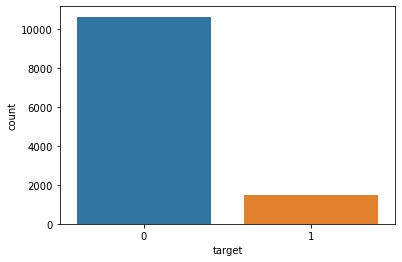

In [329]:
sns.countplot(train.target)

The dataset is is skewed towards class 0, consider balancing the dataset 

In [330]:
print("Are There Missing value in train? :",train.isnull().any().any())
print((train.isnull().sum()/train.shape[0])*100)

Are There Missing value in train? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.972100
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946270
Subject_Car_Colour        57.637222
Subject_Car_Make          20.498386
LGA_Name                  53.613710
State                     53.713056
ProductName                0.000000
target                     0.000000
dtype: float64


In [331]:
print("Are There Missing value in test? :",test.isnull().any().any())
print((test.isnull().sum()/test.shape[0])*100)

Are There Missing value in test? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.013328
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              31.639946
Subject_Car_Colour        58.045200
Subject_Car_Make          20.494495
LGA_Name                  53.737686
State                     53.853583
ProductName                0.000000
dtype: float64


Remember to handle the missing values 

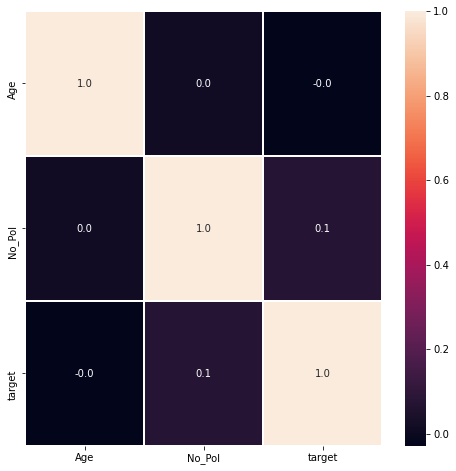

In [332]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

### Correlation might not be a best measure for this dataset since there are more categorical features

In [335]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


In [339]:
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

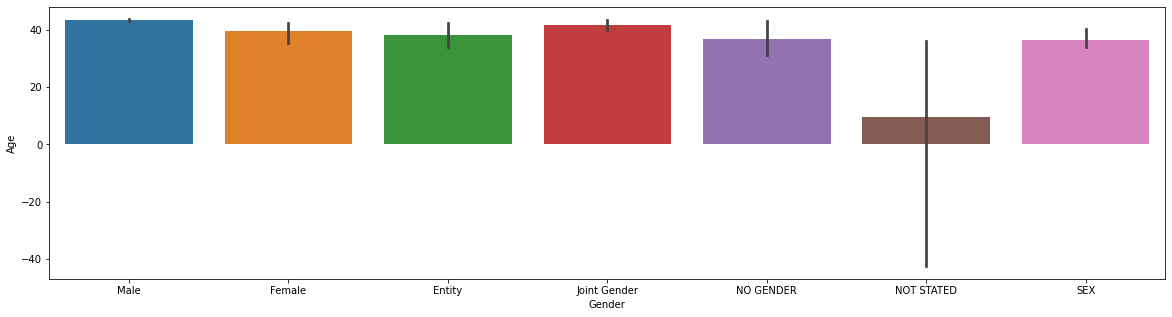

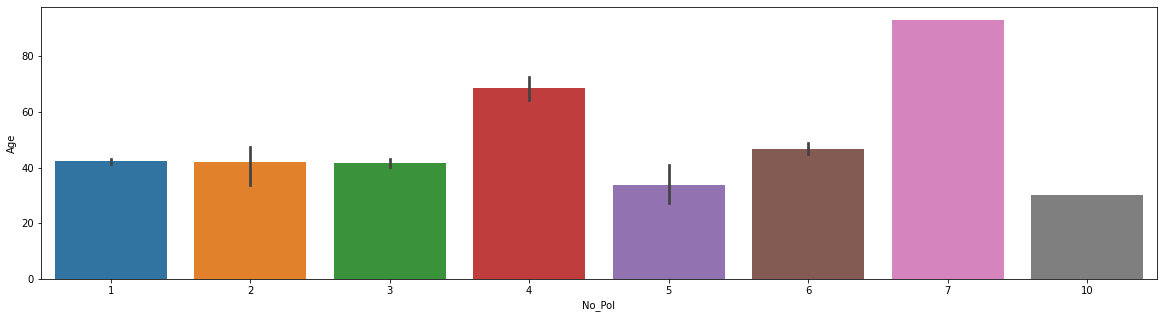

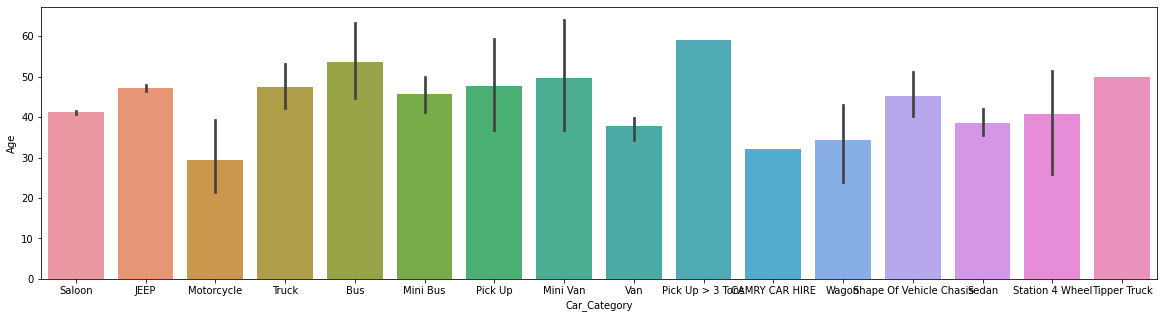

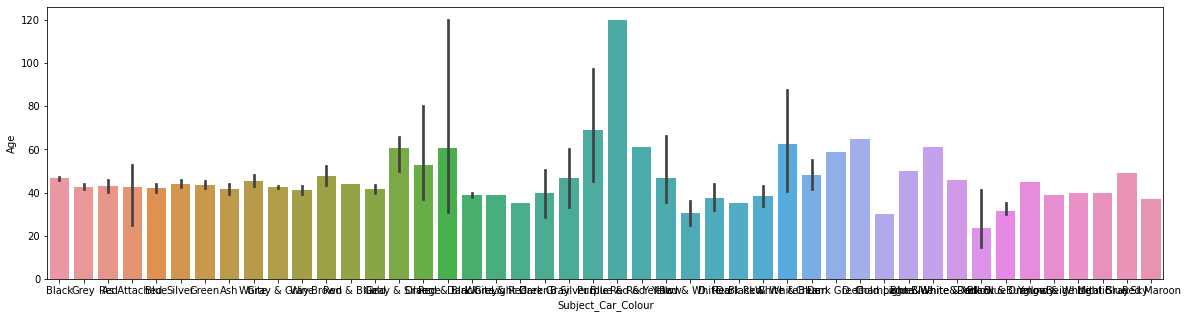

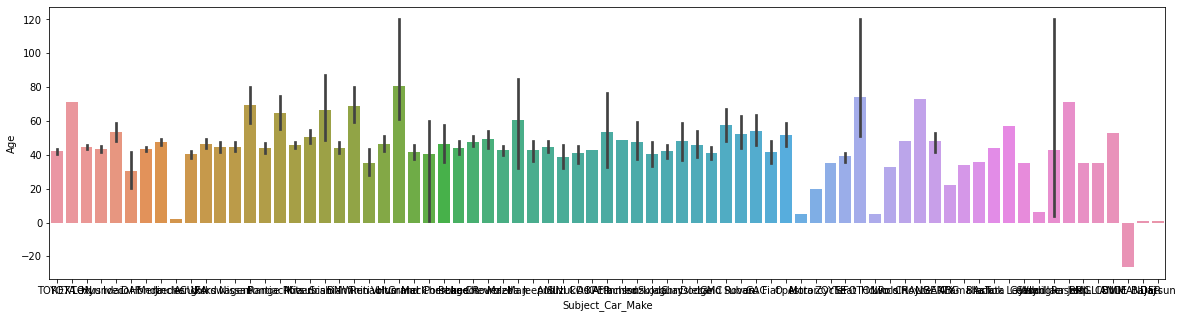

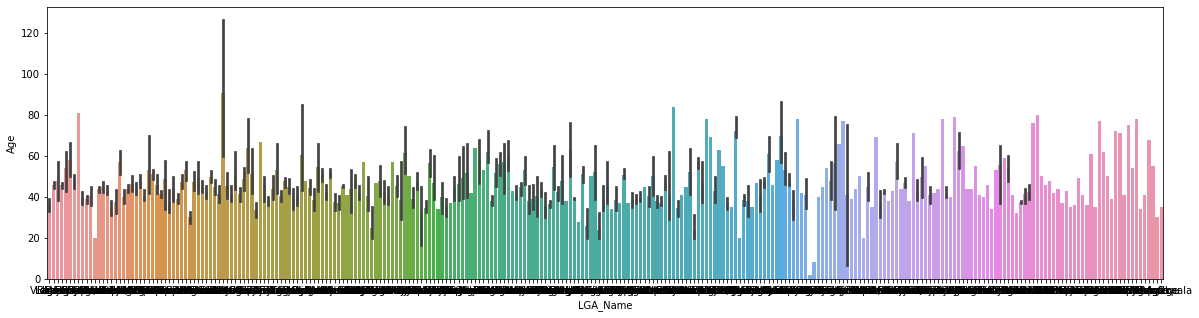

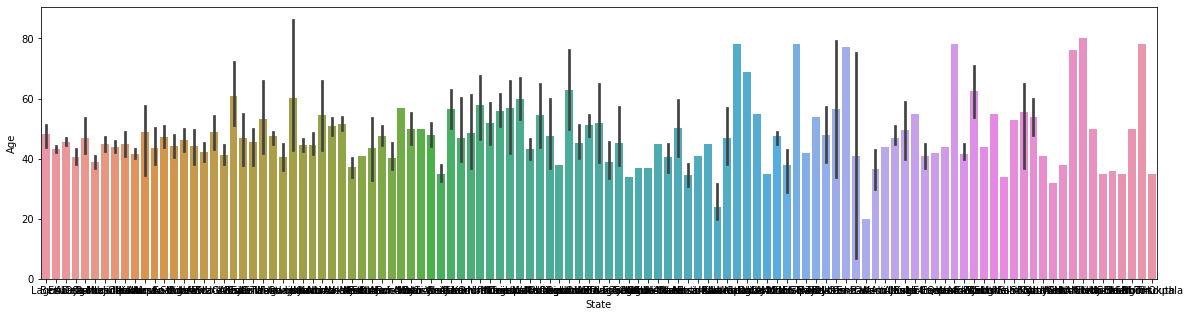

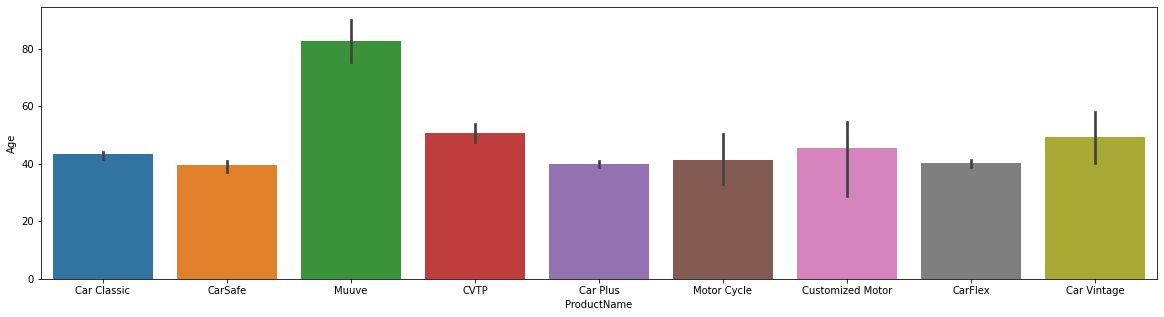

In [340]:
check_categorical_relationship(cat_col,'Age',all_data)

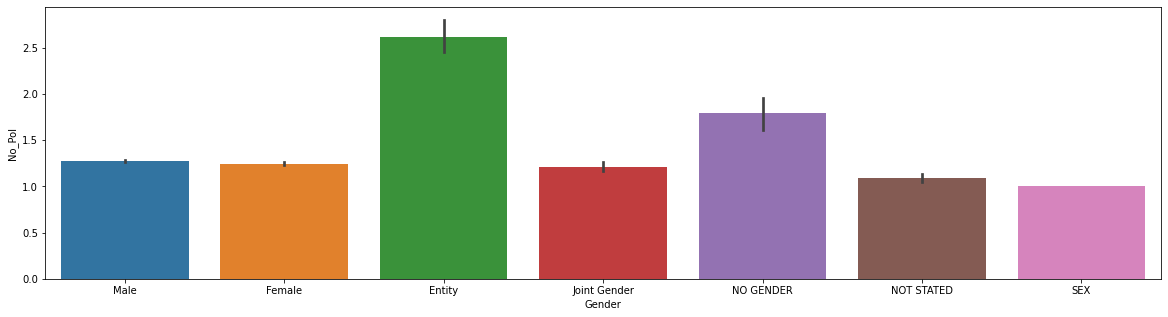

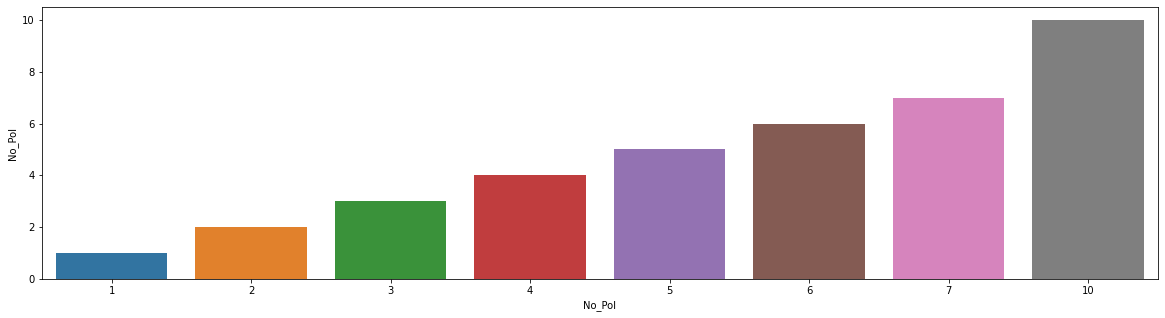

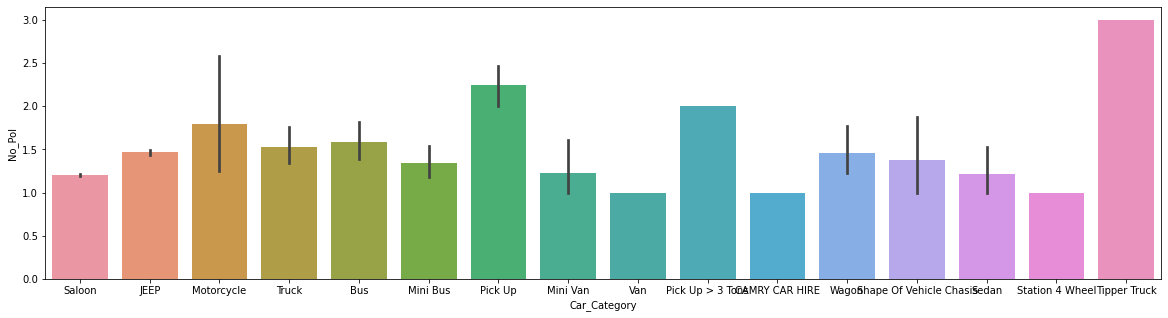

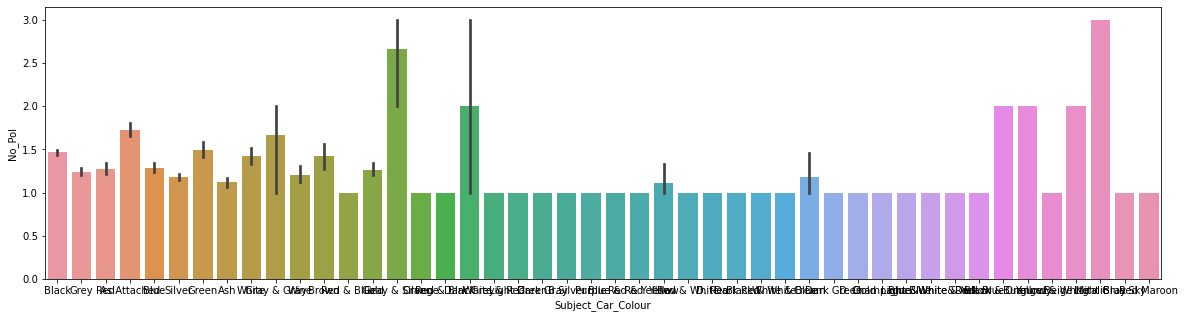

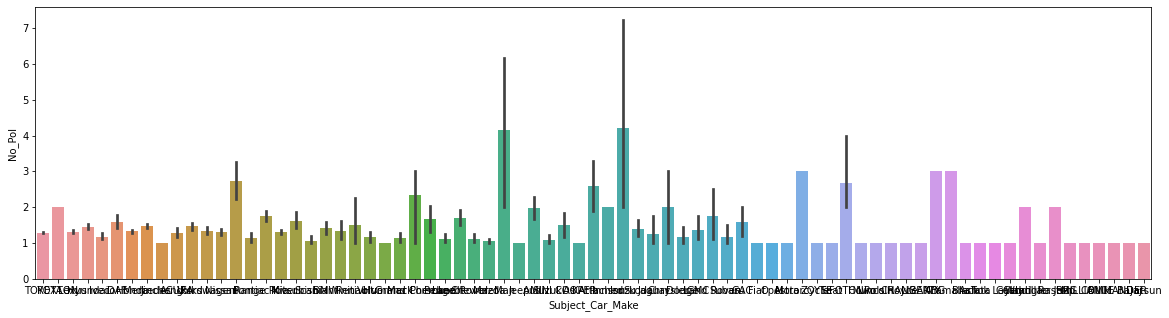

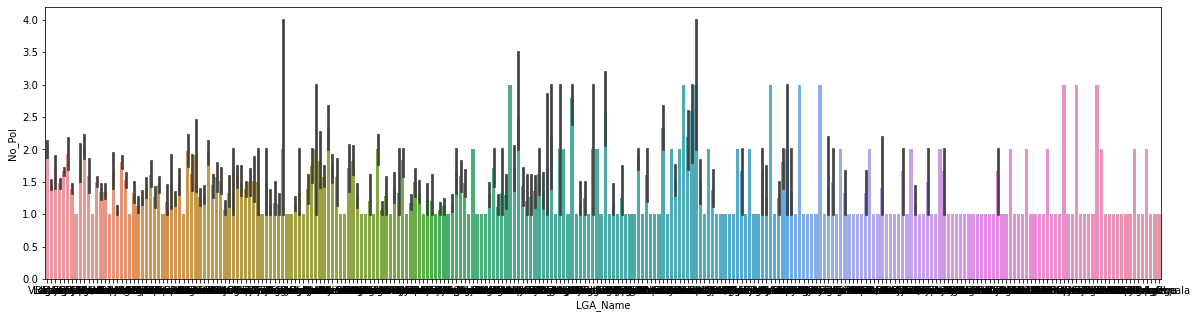

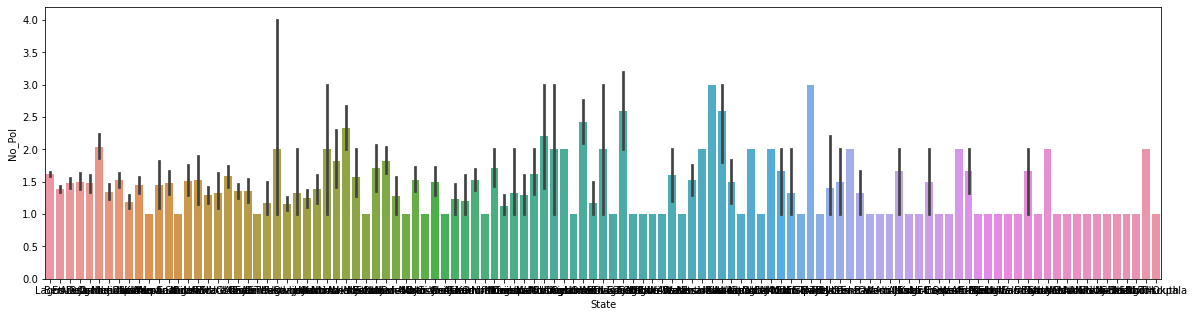

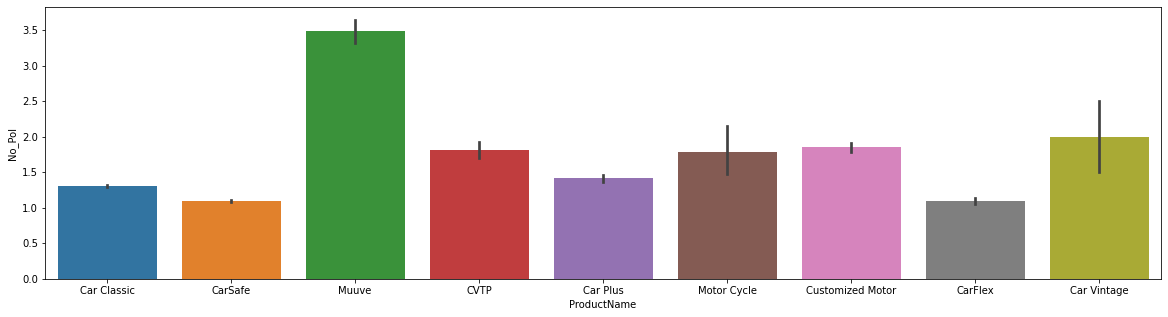

In [341]:
check_categorical_relationship(cat_col,'No_Pol',all_data)

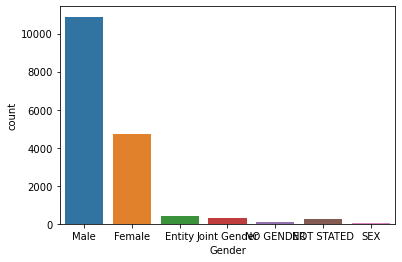

In [342]:
# Gender distribution 
sns.countplot(all_data.Gender)

In [343]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

# Basic Data preprocessing 

In [344]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


### fill mising value

In [345]:
all_data = all_data.fillna(9999)
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,9999,9999,9999,9999,9999,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0


In [346]:
print("Are There still Missing value in data? :",all_data.isnull().any().any())
print((all_data.isnull().sum()/all_data.shape[0])*100)

Are There still Missing value in data? : False
ID                        0.0
Policy Start Date         0.0
Policy End Date           0.0
Gender                    0.0
Age                       0.0
First Transaction Date    0.0
No_Pol                    0.0
Car_Category              0.0
Subject_Car_Colour        0.0
Subject_Car_Make          0.0
LGA_Name                  0.0
State                     0.0
ProductName               0.0
target                    0.0
dtype: float64


### date features

In [347]:
date_col

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [348]:
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [349]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      17256 non-null  object        
 1   Policy Start Date       17256 non-null  datetime64[ns]
 2   Policy End Date         17256 non-null  datetime64[ns]
 3   Gender                  17256 non-null  object        
 4   Age                     17256 non-null  int64         
 5   First Transaction Date  17256 non-null  datetime64[ns]
 6   No_Pol                  17256 non-null  int64         
 7   Car_Category            17256 non-null  object        
 8   Subject_Car_Colour      17256 non-null  object        
 9   Subject_Car_Make        17256 non-null  object        
 10  LGA_Name                17256 non-null  object        
 11  State                   17256 non-null  object        
 12  ProductName             17256 non-null  object

In [350]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,9999,9999,9999,9999,9999,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0


In [351]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.quarter
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [352]:
extract_date_info(all_data,date_col)

In [353]:
all_data.head()

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,...,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,0040R73,Male,30,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,...,5,2,2,13,5,2,2,14,5,2
1,0046BNK,Female,79,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,...,11,4,4,28,11,4,4,29,11,4
2,005QMC3,Male,43,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,...,3,1,1,20,3,1,1,21,3,1
3,0079OHW,Male,2,1,9999,9999,9999,9999,9999,CarSafe,...,8,3,3,20,8,3,3,21,8,3
4,00BRP63,Entity,20,3,9999,9999,9999,Lagos,Lagos,Muuve,...,8,3,4,31,12,4,3,29,8,3


In [354]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 9999, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [355]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',9999:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }

In [356]:
all_data.Gender = all_data.Gender.map(mapper)

In [357]:
all_data.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [358]:
# pd.get_dummies(all_data)

# Creat Base model 

In [359]:
all_data.target = all_data.target.astype(int)

In [360]:
all_data.drop(columns=['ID'],inplace=True)

In [361]:
#Get the new dataset
train_n = all_data[:ntrain]
test_n = all_data[ntrain:]

In [362]:
test_n.drop("target",axis = 1,inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [363]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42,)

In [365]:
test_n.columns

Index(['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName',
       'Policy Start Date_year', 'Policy Start Date_day',
       'Policy Start Date_month', 'Policy Start Date_quarter',
       'Policy End Date_year', 'Policy End Date_day', 'Policy End Date_month',
       'Policy End Date_quarter', 'First Transaction Date_year',
       'First Transaction Date_day', 'First Transaction Date_month',
       'First Transaction Date_quarter'],
      dtype='object')

In [366]:
categorical_feat = ['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']

In [367]:
categorical_feat

['Gender',
 'Age',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [368]:
from catboost import CatBoostClassifier
import catboost
model = CatBoostClassifier(cat_features=categorical_feat,verbose=50)

In [369]:
model.fit(X_train,y_train)

Learning rate set to 0.025158
0:	learn: 0.6672531	total: 18.2ms	remaining: 18.2s
50:	learn: 0.3333817	total: 449ms	remaining: 8.36s
100:	learn: 0.2964793	total: 908ms	remaining: 8.08s
150:	learn: 0.2838312	total: 1.37s	remaining: 7.72s
200:	learn: 0.2773295	total: 1.85s	remaining: 7.35s
250:	learn: 0.2721512	total: 2.48s	remaining: 7.42s
300:	learn: 0.2671586	total: 3.08s	remaining: 7.14s
350:	learn: 0.2629035	total: 3.61s	remaining: 6.67s
400:	learn: 0.2590596	total: 4.21s	remaining: 6.29s
450:	learn: 0.2553651	total: 4.71s	remaining: 5.74s
500:	learn: 0.2515452	total: 5.29s	remaining: 5.27s
550:	learn: 0.2482252	total: 5.93s	remaining: 4.83s
600:	learn: 0.2451244	total: 6.42s	remaining: 4.26s
650:	learn: 0.2422278	total: 6.98s	remaining: 3.74s
700:	learn: 0.2391465	total: 7.46s	remaining: 3.18s
750:	learn: 0.2357152	total: 8.02s	remaining: 2.66s
800:	learn: 0.2325917	total: 8.51s	remaining: 2.11s
850:	learn: 0.2295895	total: 9s	remaining: 1.57s
900:	learn: 0.2263294	total: 9.52s	rema

In [296]:
y_pred = model.predict(X_train)

In [297]:
from sklearn.metrics import classification_report

In [298]:
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pred, target_names=target_names))

*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       0.90      0.99      0.94      7110
     class 1       0.73      0.17      0.27       982

    accuracy                           0.89      8092
   macro avg       0.81      0.58      0.61      8092
weighted avg       0.88      0.89      0.86      8092



In [299]:
print('*************** Classification report on testing set ********************')
print(classification_report(y_test, model.predict(X_test), target_names=target_names))

*************** Classification report on testing set ********************
              precision    recall  f1-score   support

     class 0       0.89      0.99      0.94      3514
     class 1       0.60      0.12      0.20       473

    accuracy                           0.89      3987
   macro avg       0.75      0.55      0.57      3987
weighted avg       0.86      0.89      0.85      3987



### Train on full train dataset

In [300]:
model.fit(X,y)

Learning rate set to 0.029851
0:	learn: 0.6709212	total: 22.4ms	remaining: 22.4s
50:	learn: 0.3224438	total: 634ms	remaining: 11.8s
100:	learn: 0.2885096	total: 1.7s	remaining: 15.1s
150:	learn: 0.2793904	total: 2.71s	remaining: 15.3s
200:	learn: 0.2733042	total: 3.56s	remaining: 14.1s
250:	learn: 0.2687850	total: 4.47s	remaining: 13.4s
300:	learn: 0.2649334	total: 5.37s	remaining: 12.5s
350:	learn: 0.2615520	total: 6.21s	remaining: 11.5s
400:	learn: 0.2575390	total: 7.08s	remaining: 10.6s
450:	learn: 0.2542236	total: 7.94s	remaining: 9.67s
500:	learn: 0.2512264	total: 8.9s	remaining: 8.86s
550:	learn: 0.2470561	total: 9.91s	remaining: 8.08s
600:	learn: 0.2438768	total: 10.7s	remaining: 7.13s
650:	learn: 0.2409194	total: 11.8s	remaining: 6.33s
700:	learn: 0.2379106	total: 12.7s	remaining: 5.42s
750:	learn: 0.2351184	total: 13.7s	remaining: 4.55s
800:	learn: 0.2323654	total: 14.7s	remaining: 3.64s
850:	learn: 0.2300332	total: 15.6s	remaining: 2.73s
900:	learn: 0.2281375	total: 16.4s	rem

# First submission file

In [302]:
set(test.ID == ss.ID)

{True}

In [304]:
prediction = model.predict(test_n)

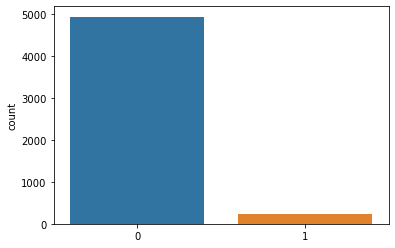

In [310]:
sns.countplot(prediction)

In [305]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [307]:
sub_file = ss.copy()

In [308]:
sub_file.target = prediction

In [309]:
sub_file.to_csv('base_model_pred_file.csv',index=False)

# Improving on model performance tips

- Deep EDA and domain knowledge sourcing
- Re-group Categorical features 
- Feature Engineering 
- Dataset balancing
- Hyperparameter tunning with gridsearch
- Ensembling of models 
- Cross-validation to avoid over fitting and under-fitting

# ******************* GOOD LUCK!!! ***************************